Η διάσταση του νέου χώρου προβολής είναι: 82


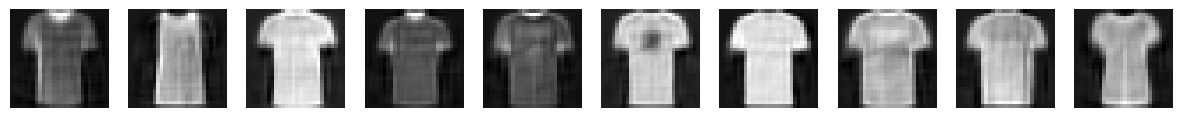

In [1]:
#Dimitriadis Georgios AM:5209
#Dimitriou Aristotelis AM:5211
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# Φόρτωση του συνόλου δεδομένων Fashion MNIST
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Επιλογή τυχαίων εικόνων από το σύνολο εκπαίδευσης
np.random.seed(42)
num_per_category = 1000
selected_images = []
selected_labels = []

for category in range(10):
    indices = np.where(train_labels == category)[0]
    selected_indices = np.random.choice(indices, num_per_category, replace=False)
    selected_images.extend(train_images[selected_indices])
    selected_labels.extend(train_labels[selected_indices])

selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

# Μετατροπή των εικόνων σε διανύσματα
num_images = selected_images.shape[0]
vectorized_images = selected_images.reshape(num_images, -1)

# Κανονικοποίηση των εικόνων
normalized_images = vectorized_images / 255.0

# Δημιουργία αντικειμένου PCA με διατήρηση του 90% της διακύμανσης
pca = PCA(0.90)

# Εφαρμογή PCA στα κανονικοποιημένα δεδομένα
pca.fit(normalized_images)

# Βρίσκουμε τον αριθμό των κύριων συνιστωσών που διατηρούν το 90% της διακύμανσης
M = pca.n_components_
print("Η διάσταση του νέου χώρου προβολής είναι:", M)

# Μείωση της διάστασης των δεδομένων χρησιμοποιώντας το PCA
reduced_images = pca.transform(normalized_images)

# Απεικόνιση των πρώτων 10 εικόνων μετά τη μείωση της διάστασης
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(pca.inverse_transform(reduced_images[i]).reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()


In [2]:
# Ορισμός της αρχικής διάστασης d και της νέας διάστασης M
d = 784  # Αρχική διάσταση των δεδομένων
M = 52  # Νέα διάσταση

# Ορισμός του μοντέλου Autoencoder
input_img = Input(shape=(d,))
encoded = Dense(d//4, activation='relu')(input_img)
encoded = Dense(M, activation='relu')(encoded)
decoded = Dense(d//4, activation='relu')(encoded)
decoded = Dense(d, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Εκπαίδευση του μοντέλου Autoencoder
autoencoder.fit(normalized_images, normalized_images,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_split=0.2)
# Χρήση του encoder για τη μείωση της διάστασης των δεδομένων
encoded_images = autoencoder.predict(normalized_images)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5375 - val_loss: 0.5329
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3421 - val_loss: 0.4498
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3173 - val_loss: 0.4384
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3057 - val_loss: 0.4155
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2985 - val_loss: 0.3844
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2946 - val_loss: 0.3765
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2917 - val_loss: 0.3739
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2873 - val_loss: 0.3711
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2859 - val_loss: 0.3667
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2846 - val_loss: 0.3611
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2823 - val_loss: 0.3589
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2793 - val_lo

In [3]:
# Διαχωρισμός των δεδομένων σε σύνολο εκπαίδευσης και σύνολο ελέγχου για PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(reduced_images, selected_labels, test_size=0.2, random_state=42)

# Εκπαίδευση του μοντέλου k-NN για τον μειωμένο χώρο χαρακτηριστικών του PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)

# Πρόβλεψη των ετικετών του συνόλου ελέγχου για PCA
y_pred_pca = knn_pca.predict(X_test_pca)

# Υπολογισμός της ακρίβειας για PCA
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print("Ακρίβεια ταξινόμησης με PCA:", accuracy_pca)

# Διαχωρισμός των δεδομένων σε σύνολο εκπαίδευσης και σύνολο ελέγχου για Autoencoder
X_train_autoencoder, X_test_autoencoder, y_train_autoencoder, y_test_autoencoder = train_test_split(encoded_images, selected_labels, test_size=0.2, random_state=42)

# Εκπαίδευση του μοντέλου k-NN για τον μειωμένο χώρο χαρακτηριστικών του Autoencoder
knn_autoencoder = KNeighborsClassifier(n_neighbors=5)
knn_autoencoder.fit(X_train_autoencoder, y_train_autoencoder)

# Πρόβλεψη των ετικετών του συνόλου ελέγχου για Autoencoder
y_pred_autoencoder = knn_autoencoder.predict(X_test_autoencoder)

# Υπολογισμός της ακρίβειας για Autoencoder
accuracy_autoencoder = accuracy_score(y_test_autoencoder, y_pred_autoencoder)
print("Ακρίβεια ταξινόμησης με Autoencoder:", accuracy_autoencoder)


Ακρίβεια ταξινόμησης με PCA: 0.8245
Ακρίβεια ταξινόμησης με Autoencoder: 0.8245


In [4]:
# Μείωση της διάστασης των δεδομένων με χρήση PCA στα δεδομένα που έχουν περάσει από το Autoencoder
pca = PCA(0.90)
encoded_images = autoencoder.predict(normalized_images)
pca.fit(encoded_images)
reduced_images = pca.transform(encoded_images)

# Δημιουργία και εκπαίδευση του ταξινομητή k-NN
X_train, X_test, y_train, y_test = train_test_split(reduced_images, selected_labels, test_size=0.2, random_state=42)
classifier = KNeighborsClassifier(n_neighbors=5)  # Ορίζουμε έναν ταξινομητή k-NN με k=5
classifier.fit(X_train, y_train)

# Αξιολόγηση του μοντέλου στα δεδομένα ελέγχου
accuracy = classifier.score(X_test, y_test)
print("Ακρίβεια ταξινόμησης στον μειωμένο χώρο μετά την εφαρμογή PCA:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
Ακρίβεια ταξινόμησης στον μειωμένο χώρο μετά την εφαρμογή PCA: 0.8045


In [ ]:
# Εύρεση βέλτιστου K για τη μέθοδο PCA
silhouette_scores_pca = []
K_range = range(10, 21)

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    labels = kmeans.fit_predict(reduced_images)  # Προσαρμογή του k-means στα μειωμένα δεδομένα
    score = silhouette_score(reduced_images, labels)  # Υπολογισμός του silhouette score
    silhouette_scores_pca.append(score)

# Εύρεση βέλτιστης τιμής Κ
best_K_pca = K_range[np.argmax(silhouette_scores_pca)]
print("Η βέλτιστη τιμή Κ για τη μέθοδο PCA είναι:", best_K_pca)

# Εύρεση βέλτιστου K για τη μέθοδο Autoencoder
silhouette_scores_autoencoder = []

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    labels = kmeans.fit_predict(encoded_images)  # Προσαρμογή του k-means στα μειωμένα δεδομένα από το Autoencoder
    score = silhouette_score(encoded_images, labels)  # Υπολογισμός του silhouette score
    silhouette_scores_autoencoder.append(score)

# Εύρεση βέλτιστης τιμής Κ
best_K_autoencoder = K_range[np.argmax(silhouette_scores_autoencoder)]
print("Η βέλτιστη τιμή Κ για τη μέθοδο Autoencoder είναι:", best_K_autoencoder)


Η βέλτιστη τιμή Κ για τη μέθοδο PCA είναι: 14


In [ ]:
# Εύρεση των κέντρων των clusters για τη μέθοδο PCA
kmeans_pca = KMeans(n_clusters=best_K_pca, random_state=42)
labels_pca = kmeans_pca.fit_predict(reduced_images)
centers_pca = kmeans_pca.cluster_centers_

# Αντίστροφη μετατροπή PCA για τα κέντρα
centers_pca_original = pca.inverse_transform(centers_pca)

# Εμφάνιση των εικόνων των κέντρων
fig, axes = plt.subplots(2, best_K_pca // 2, figsize=(15, 5))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.imshow(centers_pca_original[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Cluster {i+1}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Εύρεση των κέντρων των clusters για τη μέθοδο Autoencoder
kmeans_autoencoder = KMeans(n_clusters=best_K_autoencoder, random_state=42)
labels_autoencoder = kmeans_autoencoder.fit_predict(encoded_images)
centers_autoencoder = kmeans_autoencoder.cluster_centers_

# Αντίστροφη μετατροπή των κέντρων Autoencoder στον αρχικό χώρο
centers_autoencoder_original = autoencoder.predict(centers_autoencoder)

# Εμφάνιση των εικόνων των κέντρων
fig, axes = plt.subplots(2, best_K_autoencoder // 2, figsize=(15, 5))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.imshow(centers_autoencoder_original[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Cluster {i+1}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
def compute_purity(labels_true, labels_pred, k):
    purity_sum = 0
    for j in range(k):
        # Βρίσκουμε τις πραγματικές ετικέτες των σημείων στο cluster j
        indices = np.where(labels_pred == j)[0]
        true_labels_cluster = labels_true[indices]
        # Υπολογισμός του confusion matrix για το cluster j
        cm = confusion_matrix(true_labels_cluster, labels_pred[indices])
        # Υπολογισμός της καθαρότητας για το cluster j
        purity_sum += np.max(cm) / np.sum(cm)
    purity = purity_sum / k
    return purity

def compute_f_measure(labels_true, labels_pred, k):
    total_f_measure = 0
    for j in range(k):
        # Υπολογισμός του confusion matrix για το cluster j
        cm = confusion_matrix(labels_true, labels_pred)
        # Υπολογισμός των TP, FP και FN
        tp = cm[j, j]
        fp = np.sum(cm[j, :]) - tp
        fn = np.sum(cm[:, j]) - tp
        # Υπολογισμός του Precision και του Recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)
        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)
        # Υπολογισμός του F-measure για το cluster j
        if precision + recall == 0:
            f_measure = 0
        else:
            f_measure = (2 * precision * recall) / (precision + recall)
        total_f_measure += f_measure
    return total_f_measure / k

# Υπολογισμός της ακρίβειας και του F-measure για PCA
purity_pca = compute_purity(selected_labels, labels_pca, best_K_pca)
f_measure_pca = compute_f_measure(selected_labels, labels_pca, best_K_pca)
print("Purity για PCA:", purity_pca)
print("F-measure για PCA:", f_measure_pca)

# Υπολογισμός της ακρίβειας και του F-measure για Autoencoder
purity_autoencoder = compute_purity(selected_labels, labels_autoencoder, best_K_autoencoder)
f_measure_autoencoder = compute_f_measure(selected_labels, labels_autoencoder, best_K_autoencoder)
print("Purity για Autoencoder:", purity_autoencoder)
print("F-measure για Autoencoder:", f_measure_autoencoder)

